In [52]:
import matplotlib.pyplot as plt
from matplotlib import patches, rc, rcParams, lines, patheffects
from matplotlib.animation import FuncAnimation
import numpy as np
from tqdm import tqdm
from IPython.display import display, clear_output, Video
plt.xkcd()

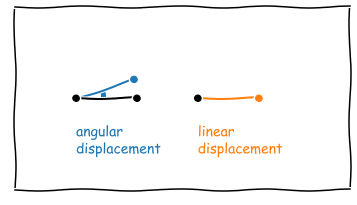

100%|██████████| 100/100 [00:37<00:00,  2.69it/s]


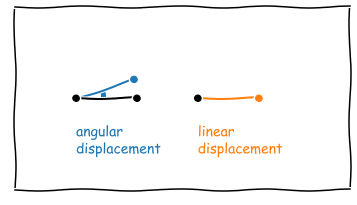

In [50]:
n = 100
def theta(i):
    if i<n//2:
        return np.pi/10+np.exp( - ((i-n//4)/(n/10))**2)
    else:
        return np.pi/10+0
def x(i):
    if i>n//2:
        return 3+np.exp( - ((i-3*n//4)/(n/10))**2)
    else:
        return 3
plt.plot([theta(i) for i in range(n)])
plt.plot([x(i) for i in range(n)])
display(plt.gcf())
for i in tqdm(range(n)):
    ts = np.arange(i)
    plt.close('all')
    plt.plot([0,np.cos(theta(i))],[0,np.sin(theta(i))],color='C0',marker='o')
    plt.gca().add_artist(patches.Arc((0,0),0.9,0.9,theta2=theta(i)*180/np.pi,color='C0',linewidth=5))
    plt.plot([0,1],[0,0],'k',marker='o')
    plt.plot([2,x(i)],[0,0],color='C1',marker='o')
    plt.plot([2],[0],'k',marker='o')
    plt.xlim(-1,4.5)
    plt.ylim(-1.5,1.5)
    plt.xticks([])
    plt.yticks([])
    plt.gca().set_aspect('equal')
    plt.text(0,-0.9, "angular\ndisplacement", color='C0')
    plt.text(2,-0.9, "linear\ndisplacement", color='C1')
    plt.savefig("frame_%05d.png"%i,dpi=300,bbox_inches='tight')
    clear_output(wait=True)
    display(plt.gcf())

In [51]:
!ffmpeg -y -pattern_type glob -framerate 20 -i 'frame_*.png' -c:v libx264 -pix_fmt yuv420p -preset slow -crf 20 out.mp4

ffmpeg version 4.2.2-1ubuntu1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-3ubuntu1)
  configuration: --prefix=/usr --extra-version=1ubuntu1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx

In [53]:
Video('out.mp4')